<a href="https://colab.research.google.com/github/merttguney/AI_106/blob/main/Gorev13_Mert_G%C3%BCney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bir veri seti bulup çoklu sınıflandırma yapın**

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression

In [22]:
df = pd.read_csv('Movie_classification.csv')

In [23]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marketing expense,506.0,92.270471,172.030902,20.1264,21.64090,25.1302,93.54165,1799.524
Production expense,506.0,77.273557,13.720706,55.9200,65.38000,74.3800,91.20000,110.480
Multiplex coverage,506.0,0.445305,0.115878,0.1290,0.37600,0.4620,0.55100,0.615
Budget,506.0,34911.144022,3903.038232,19781.3550,32693.95250,34488.2175,36793.54250,48772.900
Movie_length,506.0,142.074901,28.148861,76.4000,118.52500,151.0000,167.57500,173.500
Lead_ Actor_Rating,506.0,8.014002,1.054266,3.8400,7.31625,8.3075,8.86500,9.435
Lead_Actress_rating,506.0,8.185613,1.054290,4.0350,7.50375,8.4950,9.03000,9.540
Director_rating,506.0,8.019664,1.059899,3.8400,7.29625,8.3125,8.88375,9.425
Producer_rating,506.0,8.190514,1.049601,4.0300,7.50750,8.4650,9.03000,9.635
Critic_rating,506.0,7.810870,0.659699,6.6000,7.20000,7.9600,8.26000,9.400


In [26]:
# '3D_available' sütununu sayısal hale getirme
df['3D_available'] = df['3D_available'].map({'YES': 1, 'NO': 0})

In [27]:
df['Time_taken'] = pd.to_numeric(df['Time_taken'], errors='coerce') # Hatalı değerleri NaN yap
df['Time_taken'] = df['Time_taken'].fillna(df['Time_taken'].median())

In [28]:
X = df.drop(['Genre', 'Collection', 'Start_Tech_Oscar'], axis=1)
y = df['Genre']

In [29]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
target_names = le.classes_ # Sınıf isimlerini kaydet (değerlendirme raporunda kullanmak için)

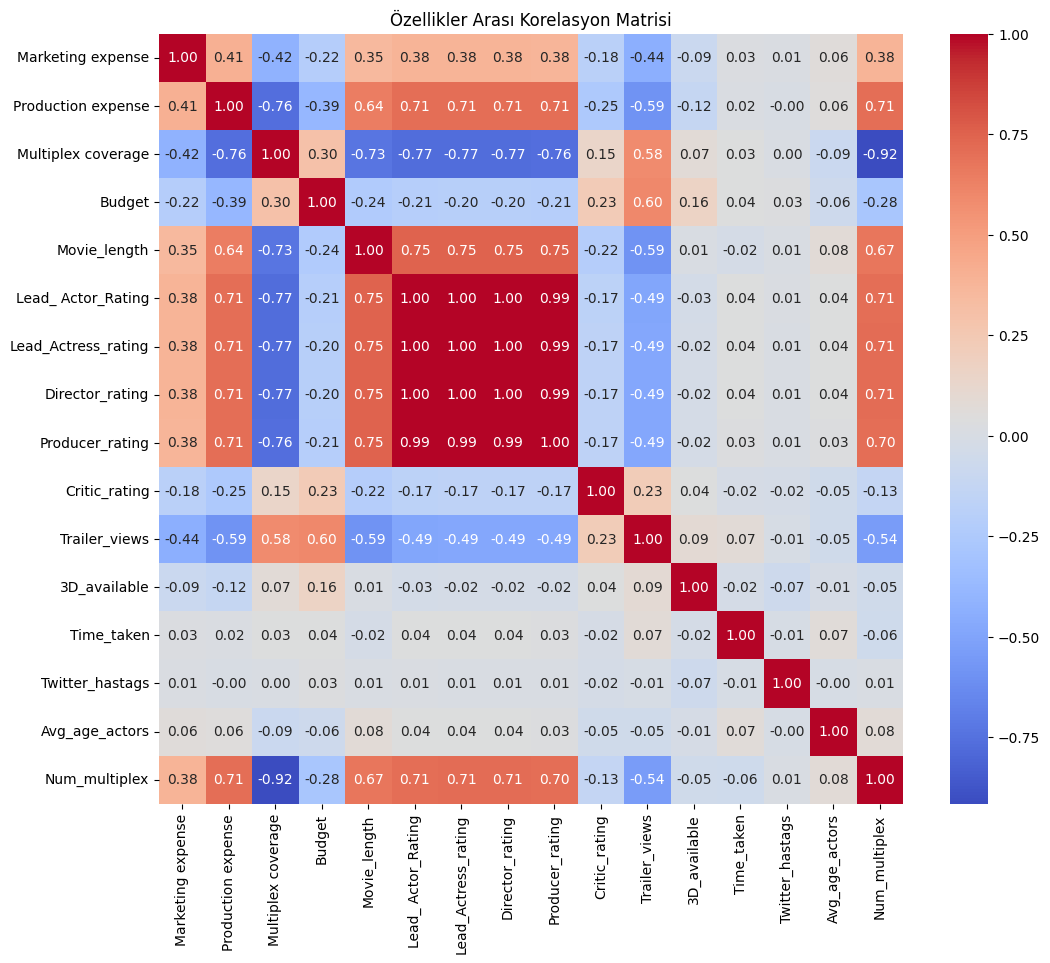

In [30]:
# Korelasyon matrisi oluşturma ve görselleştirme kısmı burası
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Özellikler Arası Korelasyon Matrisi')
plt.show()

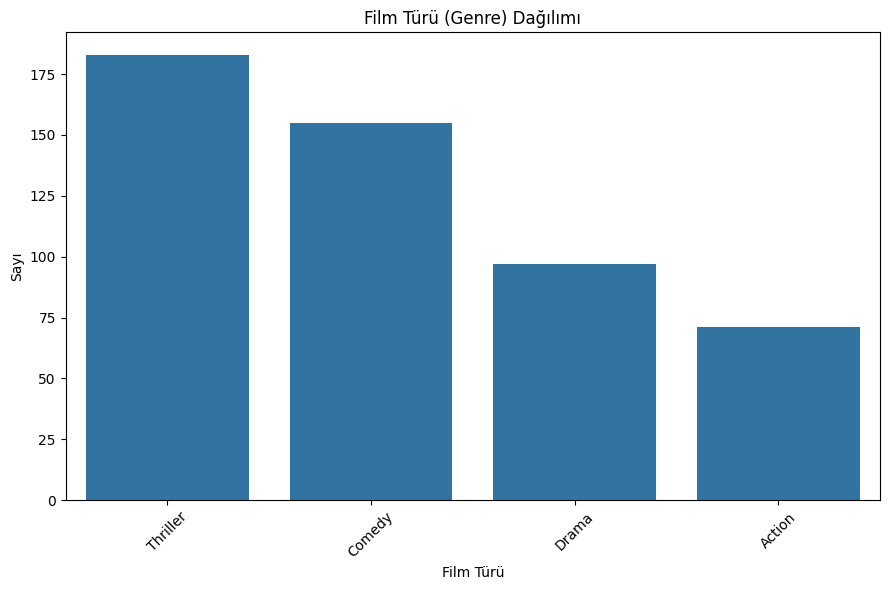

In [31]:
plt.figure(figsize=(9, 6))
sns.countplot(x=y, order=y.value_counts().index)
plt.title('Film Türü (Genre) Dağılımı')
plt.xlabel('Film Türü')
plt.ylabel('Sayı')
plt.xticks(rotation=45) # Etiketlerin çakışmasını önlemek için döndür
plt.tight_layout() # Düzeni sıkılaştır
plt.show()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Model oluşturma ve eğitme (Lojistik Regresyon Classifier)
model = LogisticRegression(random_state=42, solver='liblinear', multi_class='ovr') # Çoklu sınıflandırma için 'ovr' (one-vs-rest) veya 'multinomial' kullanılabilir.
model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr', random_state=42, solver='liblinear')

In [34]:
y_pred = model.predict(X_test_scaled)

In [35]:
print(f"Doğruluk (Accuracy): {accuracy_score(y_test, y_pred):.4f}")

Doğruluk (Accuracy): 0.3431


In [36]:
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred, target_names=target_names))


Sınıflandırma Raporu:
              precision    recall  f1-score   support

      Action       0.50      0.07      0.12        14
      Comedy       0.32      0.39      0.35        31
       Drama       0.00      0.00      0.00        20
    Thriller       0.37      0.59      0.46        37

    accuracy                           0.34       102
   macro avg       0.30      0.26      0.23       102
weighted avg       0.30      0.34      0.29       102



In [39]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")

Mean Absolute Error (MAE): 1.1373
Mean Squared Error (MSE): 2.2745
Root Mean Squared Error (RMSE): 1.5081
R-squared (R2) Score: -0.9454


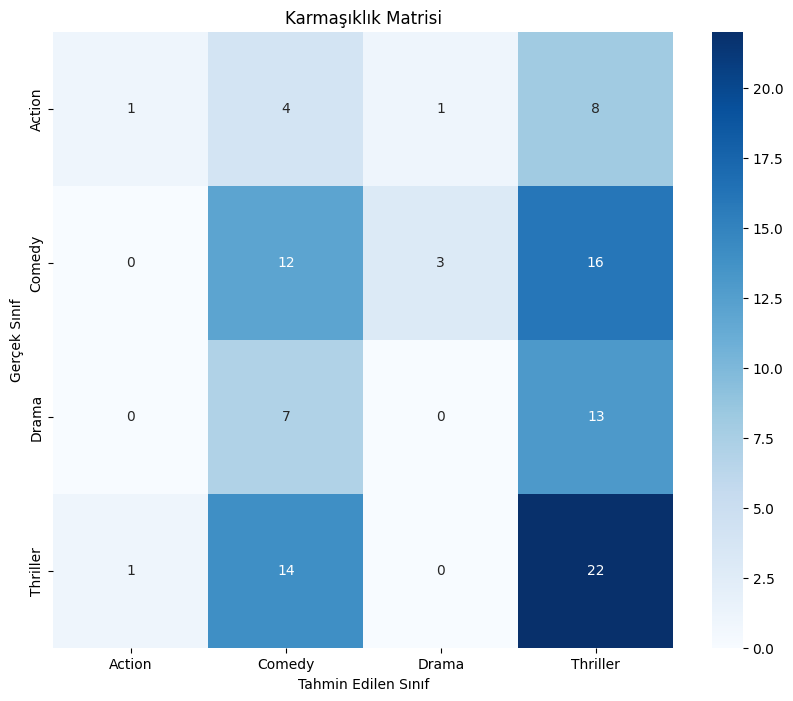

In [40]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()